# <center> **Inferential Statistics**

---

<center><img src="samp_pop.PNG"></center>

### **Hypothesis Testing**

---

> Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data.
Hypothesis Testing is basically an assumption that we make about the population parameter.

> In simple words we make a Yes (Significant) or No (Not Significant) decision using Statastics using a sample of
population data to check significance between features.

> We have to make decisions about the hypothesis. These decisions include deciding if we should accept the null
hypothesis or if we should reject the null hypothesis. Every test in hypothesis testing produces the significance
value for that particular test. In Hypothesis testing, if the significance value of the test is greater than the
predetermined significance level, then we accept the null hypothesis. If the significance value is less than the
predetermined value, then we should reject the null hypothesis.

> **Example**

> * A school teacher might want to check if there is a significant different between the test results of students who attended an extra class versus that of those who did not.

> * Your client were able to acquire 1000 customers each month in 2020. Now given the monthly acquisitions of 2021, they request you to check if they are still on track or if the monthly average is signifcantly lower this year.


<center><img src="ht.PNG"></center>

---

#### Few Useful Terms


> 1. **Null hypothesis**

Null hypothesis is a statistical hypothesis that assumes that the observation is due to a chance factor.
Null hypothesis is denoted by; H0: μ1 = μ2, which shows that there is no difference between the two
population means.

> 2. **Alternative hypothesis**

Contrary to the null hypothesis, the alternative hypothesis shows that observations are the result of a
real effect.

> 3. **Level of significance / P-value**

Refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is
not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is
usually 5%.

> 4. **Type I error**

**When we reject the null hypothesis, although that hypothesis was true**. Type I error is denoted by alpha.
In hypothesis testing, the normal curve that shows the critical region is called the alpha region.

> 5. **Type II errors**

**When we do not reject the null hypothesis but it is false**. Type II errors are denoted by beta. In Hypothesis
testing, the normal curve that shows the acceptance region is called the beta region.

---

<center><img src="side.PNG">

### <center> **Type 1 error or Type 2 error - which one is worse?**

---

<center><img src="error.PNG">

In [1]:
import pandas as pd
df = pd.read_csv('mileage.csv', sep=',', header=0)
df.head()

,Car Variant ID,Electric Vehicle,Mileage
0,641,1,19.0
1,748,1,15.9
2,57,1,16.3
3,617,0,16.1
4,423,1,15.9


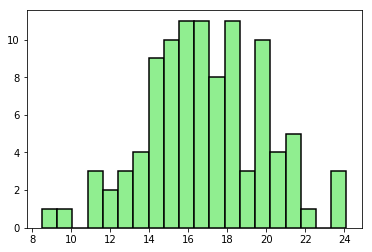

In [2]:
import matplotlib.pyplot as plt
plt.hist(df['Mileage'], bins=20, color='lightgreen', histtype='bar', edgecolor='black', linewidth=1.5)
plt.show()

## TEST #1 - NORMALITY

### <center> What is a normal distribution?

---

<center><img src="normal.PNG"></center>

> If something is said to follow the normal distribution, it means in the most simple terms that most of the data lies around the average. An easy example is the distribution of test grades in schools. Most people will score around the average, with a few high scores and a few low scores. This means that most people get C's, while only a few get A's and F's

<center>**Bitter Truth: True Normality is nothing less than a myth**

In [3]:
from scipy import stats

##############################################
##### Shapiro-Wilks Test for normality   #####
##############################################
shapiro_results = stats.shapiro(df['Mileage'])

In [4]:
# Test Statistic
shapiro_results[0]

0.9945541620254517

In [5]:
# p-value
shapiro_results[1]

0.9619031548500061

## TEST #2 - MEAN (SINGLE SAMPLE)

### 1 sample T-test

> **Assumptions:**

> Variable type must be quantitative in nature

> Sample should be a SRS (Simple Random Sample)

> Sample should come from a normal distribution

In [6]:
ttest_1samp_results = stats.ttest_1samp(df['Mileage'], popmean=17, axis=0, nan_policy='omit')

In [7]:
# Test Statistic
ttest_1samp_results[0]

-0.47086157451932653

In [8]:
# p-value
ttest_1samp_results[1]

0.6387754355352087

## TEST #3 - VARIANCE

### <center> **Now what exactly is variance?**

---

> The variance of a group of numbers is the sum of the squares of the difference between each score and the average score, divided by one fewer than the number of scores.

<center><img src="var.PNG">

You scored --> 70
Average (mean) --> 72
Scores --> 100, 80, 80, 70, 30

In [9]:
df["Mileage"].var()

9.22328383838384

In [10]:
df["Mileage"].std()

3.036985979286674

In [11]:
# Why do we need standard deviation if we already have variance?

In [12]:
sample_1 = df.loc[df['Electric Vehicle']==0,'Mileage']
sample_2 = df.loc[df['Electric Vehicle']==1,'Mileage']

bartlett_results = stats.bartlett(sample_1, sample_2)

In [13]:
# Test statistic
bartlett_results[0]

0.015008585617447235

In [14]:
# p-value
bartlett_results[1]

0.9024954968094653

## TEST #4 - MEAN (TWO SAMPLES)

### Independent 2 sample T-test

> **Assumptions:**

> All assumptions of 1 sample T-test and below ones

> Samples should be independent of each other

> Samples should have approximately equal variance. Other words, samples should come from populations with equal variance 

In [15]:
ttest_ind_results = stats.ttest_ind(sample_1, sample_2, axis=0, equal_var=True, nan_policy='omit')

In [16]:
# Test statistic
ttest_ind_results[0]

-1.4022507564081854

In [17]:
# p-value
ttest_ind_results[1]

0.16400009850904873